# MSB305 Final project: Predicting Grocery Store Daily Sales Per Product Family

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
train1 = pd.read_csv("train.csv", index_col=0, keep_date_col=True)

In [176]:
train1.sample(5)

,date,store_nbr,family,sales,onpromotion
id,,,,,
2221139,2016-06-03,30,DAIRY,241.0,3
1551015,2015-05-23,28,HOME AND KITCHEN I,15.0,0
576573,2013-11-20,36,PRODUCE,0.0,0
1579644,2015-06-08,31,AUTOMOTIVE,9.0,0
2679302,2017-02-16,35,SEAFOOD,0.0,0


In [4]:
test1 = pd.read_csv("test.csv", index_col=0)

In [5]:
df0 = pd.concat([train1, test1])
df0

,date,store_nbr,family,sales,onpromotion
id,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,2013-01-01,1,BABY CARE,0.0,0
2,2013-01-01,1,BEAUTY,0.0,0
3,2013-01-01,1,BEVERAGES,0.0,0
4,2013-01-01,1,BOOKS,0.0,0
...,...,...,...,...,...
3029395,2017-08-31,9,POULTRY,NaN,1
3029396,2017-08-31,9,PREPARED FOODS,NaN,0
3029397,2017-08-31,9,PRODUCE,NaN,1


## Part I: Data Integration

### integrate oil price dataset:

In [6]:
gas = pd.read_csv("oil.csv", names=['date','gas_price'], header=0)

In [7]:
date_range = pd.period_range(start="2013-01-01", end="2017-08-31")

In [8]:
date_range1 = date_range.astype(str, copy=False)

In [9]:
calendar = pd.DataFrame(date_range1, columns= ["date"])
calendar.dtypes

date    object
dtype: object

In [10]:
oil = pd.merge(left=calendar, right = gas, how = "left", on="date")

In [11]:
oil

,date,gas_price
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-05,NaN
...,...,...
1699,2017-08-27,NaN
1700,2017-08-28,46.40
1701,2017-08-29,46.46
1702,2017-08-30,45.96


In [12]:
interpolated_oil = oil.interpolate(method="linear")

In [13]:
interpolated_oil.fillna(93.140000, inplace=True)

In [14]:
interpolated_oil

,date,gas_price
0,2013-01-01,93.140000
1,2013-01-02,93.140000
2,2013-01-03,92.970000
3,2013-01-04,93.120000
4,2013-01-05,93.146667
...,...,...
1699,2017-08-27,46.816667
1700,2017-08-28,46.400000
1701,2017-08-29,46.460000
1702,2017-08-30,45.960000


In [15]:
df1 = pd.merge(left=df0, right=interpolated_oil, how="left", on="date")
df1

,date,store_nbr,family,sales,onpromotion,gas_price
0,2013-01-01,1,AUTOMOTIVE,0.0,0,93.14
1,2013-01-01,1,BABY CARE,0.0,0,93.14
2,2013-01-01,1,BEAUTY,0.0,0,93.14
3,2013-01-01,1,BEVERAGES,0.0,0,93.14
4,2013-01-01,1,BOOKS,0.0,0,93.14
...,...,...,...,...,...,...
3029395,2017-08-31,9,POULTRY,NaN,1,47.26
3029396,2017-08-31,9,PREPARED FOODS,NaN,0,47.26
3029397,2017-08-31,9,PRODUCE,NaN,1,47.26
3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,NaN,9,47.26


### Integrate Stores dataset:

In [16]:
stores = pd.read_csv("stores.csv")
stores

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [17]:
df2 = pd.merge(left=df1, right=stores, how="left", on="store_nbr")
df2

,date,store_nbr,family,sales,onpromotion,gas_price,city,state,type,cluster
0,2013-01-01,1,AUTOMOTIVE,0.0,0,93.14,Quito,Pichincha,D,13
1,2013-01-01,1,BABY CARE,0.0,0,93.14,Quito,Pichincha,D,13
2,2013-01-01,1,BEAUTY,0.0,0,93.14,Quito,Pichincha,D,13
3,2013-01-01,1,BEVERAGES,0.0,0,93.14,Quito,Pichincha,D,13
4,2013-01-01,1,BOOKS,0.0,0,93.14,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...
3029395,2017-08-31,9,POULTRY,NaN,1,47.26,Quito,Pichincha,B,6
3029396,2017-08-31,9,PREPARED FOODS,NaN,0,47.26,Quito,Pichincha,B,6
3029397,2017-08-31,9,PRODUCE,NaN,1,47.26,Quito,Pichincha,B,6
3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,NaN,9,47.26,Quito,Pichincha,B,6


### integrate holiday dataset:

In [18]:
holiday = pd.read_csv("holidays_events.csv")

In [19]:
holiday

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [175]:
holiday_national=holiday.loc[holiday['locale_name'] == "Ecuador" , :]
holiday_national.sample(50)

,date,type,locale,locale_name,description,transferred
130,2014-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,False
38,2012-12-26,Additional,National,Ecuador,Navidad+1,False
251,2016-05-13,Event,National,Ecuador,Terremoto Manabi+27,False
155,2014-12-25,Holiday,National,Ecuador,Navidad,False
85,2013-12-22,Additional,National,Ecuador,Navidad-3,False
254,2016-05-16,Event,National,Ecuador,Terremoto Manabi+30,False
113,2014-06-25,Event,National,Ecuador,Mundial de futbol Brasil: Ecuador-Francia,False
135,2014-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
239,2016-05-04,Event,National,Ecuador,Terremoto Manabi+18,False
160,2015-01-02,Bridge,National,Ecuador,Puente Primer dia del ano,False


In [21]:
locale_name = set(holiday.locale_name)
holiday.locale_name.value_counts()

Ecuador                           174
Quito                              13
Riobamba                           12
Guaranda                           12
Latacunga                          12
Ambato                             12
Guayaquil                          11
Cuenca                              7
Ibarra                              7
Salinas                             6
Loja                                6
Santa Elena                         6
Santo Domingo de los Tsachilas      6
Quevedo                             6
Manta                               6
Esmeraldas                          6
Cotopaxi                            6
El Carmen                           6
Santo Domingo                       6
Machala                             6
Imbabura                            6
Puyo                                6
Libertad                            6
Cayambe                             6
Name: locale_name, dtype: int64

In [22]:
city_name = set(df2.city)
df2.city.value_counts()

Quito            1009800
Guayaquil         448800
Santo Domingo     168300
Cuenca            168300
Latacunga         112200
Manta             112200
Machala           112200
Ambato            112200
Quevedo            56100
Esmeraldas         56100
Loja               56100
Libertad           56100
Playas             56100
Daule              56100
Babahoyo           56100
Cayambe            56100
Salinas            56100
Puyo               56100
Guaranda           56100
Ibarra             56100
Riobamba           56100
El Carmen          56100
Name: city, dtype: int64

In [23]:
city_name & locale_name

{'Ambato',
 'Cayambe',
 'Cuenca',
 'El Carmen',
 'Esmeraldas',
 'Guaranda',
 'Guayaquil',
 'Ibarra',
 'Latacunga',
 'Libertad',
 'Loja',
 'Machala',
 'Manta',
 'Puyo',
 'Quevedo',
 'Quito',
 'Riobamba',
 'Salinas',
 'Santo Domingo'}

In [24]:
df2.state.value_counts()

Pichincha                         1065900
Guayas                             617100
Santo Domingo de los Tsachilas     168300
Azuay                              168300
Manabi                             168300
Cotopaxi                           112200
Tungurahua                         112200
Los Rios                           112200
El Oro                             112200
Chimborazo                          56100
Imbabura                            56100
Bolivar                             56100
Pastaza                             56100
Santa Elena                         56100
Loja                                56100
Esmeraldas                          56100
Name: state, dtype: int64

In [25]:
set(df2.state) & locale_name

{'Cotopaxi',
 'Esmeraldas',
 'Imbabura',
 'Loja',
 'Santa Elena',
 'Santo Domingo de los Tsachilas'}

In [26]:
holiday

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [27]:
# add national holidays:

In [28]:
df3_national = pd.merge(left=df2, right=holiday_national[["date","locale"]], how="left", on="date")
df3_national

,date,store_nbr,family,sales,onpromotion,gas_price,city,state,type,cluster,locale
0,2013-01-01,1,AUTOMOTIVE,0.0,0,93.14,Quito,Pichincha,D,13,National
1,2013-01-01,1,BABY CARE,0.0,0,93.14,Quito,Pichincha,D,13,National
2,2013-01-01,1,BEAUTY,0.0,0,93.14,Quito,Pichincha,D,13,National
3,2013-01-01,1,BEVERAGES,0.0,0,93.14,Quito,Pichincha,D,13,National
4,2013-01-01,1,BOOKS,0.0,0,93.14,Quito,Pichincha,D,13,National
...,...,...,...,...,...,...,...,...,...,...,...
3036523,2017-08-31,9,POULTRY,NaN,1,47.26,Quito,Pichincha,B,6,NaN
3036524,2017-08-31,9,PREPARED FOODS,NaN,0,47.26,Quito,Pichincha,B,6,NaN
3036525,2017-08-31,9,PRODUCE,NaN,1,47.26,Quito,Pichincha,B,6,NaN
3036526,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,NaN,9,47.26,Quito,Pichincha,B,6,NaN


In [29]:
df3_national['locale'] = df3_national['locale'].fillna(0)
df3_national['national_holiday'] = df3_national['locale'].map(lambda x: 'No' if x==0 else 'Yes')
df3_national

,date,store_nbr,family,sales,onpromotion,gas_price,city,state,type,cluster,locale,national_holiday
0,2013-01-01,1,AUTOMOTIVE,0.0,0,93.14,Quito,Pichincha,D,13,National,Yes
1,2013-01-01,1,BABY CARE,0.0,0,93.14,Quito,Pichincha,D,13,National,Yes
2,2013-01-01,1,BEAUTY,0.0,0,93.14,Quito,Pichincha,D,13,National,Yes
3,2013-01-01,1,BEVERAGES,0.0,0,93.14,Quito,Pichincha,D,13,National,Yes
4,2013-01-01,1,BOOKS,0.0,0,93.14,Quito,Pichincha,D,13,National,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
3036523,2017-08-31,9,POULTRY,NaN,1,47.26,Quito,Pichincha,B,6,0,No
3036524,2017-08-31,9,PREPARED FOODS,NaN,0,47.26,Quito,Pichincha,B,6,0,No
3036525,2017-08-31,9,PRODUCE,NaN,1,47.26,Quito,Pichincha,B,6,0,No
3036526,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,NaN,9,47.26,Quito,Pichincha,B,6,0,No


In [30]:
# add regional holidays:

In [31]:
holiday_regional=holiday.loc[holiday['locale'] == "Regional" , :]
holiday_regional

,date,type,locale,locale_name,description,transferred
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
7,2012-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False
23,2012-11-06,Holiday,Regional,Santo Domingo de los Tsachilas,Provincializacion de Santo Domingo,False
24,2012-11-07,Holiday,Regional,Santa Elena,Provincializacion Santa Elena,False
47,2013-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
58,2013-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False
76,2013-11-06,Holiday,Regional,Santo Domingo de los Tsachilas,Provincializacion de Santo Domingo,False
77,2013-11-07,Holiday,Regional,Santa Elena,Provincializacion Santa Elena,False
96,2014-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
112,2014-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False


In [32]:
df3_regional = pd.merge(left=df3_national, right=holiday_regional[["date","locale_name"]], how="left", 
                        left_on=['date','state'],
                       right_on=['date','locale_name'])
df3_regional

,date,store_nbr,family,sales,onpromotion,gas_price,city,state,type,cluster,locale,national_holiday,locale_name
0,2013-01-01,1,AUTOMOTIVE,0.0,0,93.14,Quito,Pichincha,D,13,National,Yes,NaN
1,2013-01-01,1,BABY CARE,0.0,0,93.14,Quito,Pichincha,D,13,National,Yes,NaN
2,2013-01-01,1,BEAUTY,0.0,0,93.14,Quito,Pichincha,D,13,National,Yes,NaN
3,2013-01-01,1,BEVERAGES,0.0,0,93.14,Quito,Pichincha,D,13,National,Yes,NaN
4,2013-01-01,1,BOOKS,0.0,0,93.14,Quito,Pichincha,D,13,National,Yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3036523,2017-08-31,9,POULTRY,NaN,1,47.26,Quito,Pichincha,B,6,0,No,NaN
3036524,2017-08-31,9,PREPARED FOODS,NaN,0,47.26,Quito,Pichincha,B,6,0,No,NaN
3036525,2017-08-31,9,PRODUCE,NaN,1,47.26,Quito,Pichincha,B,6,0,No,NaN
3036526,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,NaN,9,47.26,Quito,Pichincha,B,6,0,No,NaN


In [33]:
df3_regional.locale_name.value_counts()

Santo Domingo de los Tsachilas    396
Cotopaxi                          330
Imbabura                          165
Santa Elena                       132
Name: locale_name, dtype: int64

In [34]:
df3_regional["regional_holiday"] = df3_regional.locale_name.fillna(0).map(lambda x: 'No' if x==0 else 'Yes')

In [35]:
df3_regional

,date,store_nbr,family,sales,onpromotion,gas_price,city,state,type,cluster,locale,national_holiday,locale_name,regional_holiday
0,2013-01-01,1,AUTOMOTIVE,0.0,0,93.14,Quito,Pichincha,D,13,National,Yes,NaN,No
1,2013-01-01,1,BABY CARE,0.0,0,93.14,Quito,Pichincha,D,13,National,Yes,NaN,No
2,2013-01-01,1,BEAUTY,0.0,0,93.14,Quito,Pichincha,D,13,National,Yes,NaN,No
3,2013-01-01,1,BEVERAGES,0.0,0,93.14,Quito,Pichincha,D,13,National,Yes,NaN,No
4,2013-01-01,1,BOOKS,0.0,0,93.14,Quito,Pichincha,D,13,National,Yes,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3036523,2017-08-31,9,POULTRY,NaN,1,47.26,Quito,Pichincha,B,6,0,No,NaN,No
3036524,2017-08-31,9,PREPARED FOODS,NaN,0,47.26,Quito,Pichincha,B,6,0,No,NaN,No
3036525,2017-08-31,9,PRODUCE,NaN,1,47.26,Quito,Pichincha,B,6,0,No,NaN,No
3036526,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,NaN,9,47.26,Quito,Pichincha,B,6,0,No,NaN,No


In [36]:
# add local holidays:

In [37]:
holiday_local=holiday.loc[holiday['locale'] == "Local" , :]
holiday_local

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
5,2012-05-12,Holiday,Local,Puyo,Cantonizacion del Puyo,False
...,...,...,...,...,...,...
339,2017-12-05,Additional,Local,Quito,Fundacion de Quito-1,False
340,2017-12-06,Holiday,Local,Quito,Fundacion de Quito,True
341,2017-12-08,Holiday,Local,Loja,Fundacion de Loja,False
342,2017-12-08,Transfer,Local,Quito,Traslado Fundacion de Quito,False


In [38]:
df3_local = pd.merge(left=df3_regional, right=holiday_local[["date","locale_name"]], how="left", 
                        left_on=['date','city'],
                       right_on=['date','locale_name'])
df3_local

,date,store_nbr,family,sales,onpromotion,gas_price,city,state,type,cluster,locale,national_holiday,locale_name_x,regional_holiday,locale_name_y
0,2013-01-01,1,AUTOMOTIVE,0.0,0,93.14,Quito,Pichincha,D,13,National,Yes,NaN,No,NaN
1,2013-01-01,1,BABY CARE,0.0,0,93.14,Quito,Pichincha,D,13,National,Yes,NaN,No,NaN
2,2013-01-01,1,BEAUTY,0.0,0,93.14,Quito,Pichincha,D,13,National,Yes,NaN,No,NaN
3,2013-01-01,1,BEVERAGES,0.0,0,93.14,Quito,Pichincha,D,13,National,Yes,NaN,No,NaN
4,2013-01-01,1,BOOKS,0.0,0,93.14,Quito,Pichincha,D,13,National,Yes,NaN,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3036787,2017-08-31,9,POULTRY,NaN,1,47.26,Quito,Pichincha,B,6,0,No,NaN,No,NaN
3036788,2017-08-31,9,PREPARED FOODS,NaN,0,47.26,Quito,Pichincha,B,6,0,No,NaN,No,NaN
3036789,2017-08-31,9,PRODUCE,NaN,1,47.26,Quito,Pichincha,B,6,0,No,NaN,No,NaN
3036790,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,NaN,9,47.26,Quito,Pichincha,B,6,0,No,NaN,No,NaN


In [39]:
df3_local['local_holiday'] = df3_local['locale_name_y'].fillna(0).map(lambda x: 'No' if x==0 else 'Yes')
df3_local

,date,store_nbr,family,sales,onpromotion,gas_price,city,state,type,cluster,locale,national_holiday,locale_name_x,regional_holiday,locale_name_y,local_holiday
0,2013-01-01,1,AUTOMOTIVE,0.0,0,93.14,Quito,Pichincha,D,13,National,Yes,NaN,No,NaN,No
1,2013-01-01,1,BABY CARE,0.0,0,93.14,Quito,Pichincha,D,13,National,Yes,NaN,No,NaN,No
2,2013-01-01,1,BEAUTY,0.0,0,93.14,Quito,Pichincha,D,13,National,Yes,NaN,No,NaN,No
3,2013-01-01,1,BEVERAGES,0.0,0,93.14,Quito,Pichincha,D,13,National,Yes,NaN,No,NaN,No
4,2013-01-01,1,BOOKS,0.0,0,93.14,Quito,Pichincha,D,13,National,Yes,NaN,No,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3036787,2017-08-31,9,POULTRY,NaN,1,47.26,Quito,Pichincha,B,6,0,No,NaN,No,NaN,No
3036788,2017-08-31,9,PREPARED FOODS,NaN,0,47.26,Quito,Pichincha,B,6,0,No,NaN,No,NaN,No
3036789,2017-08-31,9,PRODUCE,NaN,1,47.26,Quito,Pichincha,B,6,0,No,NaN,No,NaN,No
3036790,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,NaN,9,47.26,Quito,Pichincha,B,6,0,No,NaN,No,NaN,No


In [40]:
df3_local['national_holiday'].value_counts()

No     2774838
Yes     261954
Name: national_holiday, dtype: int64

In [41]:
df3_local['regional_holiday'].value_counts()

No     3035769
Yes       1023
Name: regional_holiday, dtype: int64

In [42]:
df3_local['local_holiday'].value_counts()

No     3024219
Yes      12573
Name: local_holiday, dtype: int64

In [43]:
df3 = df3_local[['date','store_nbr','type','cluster','family',
                 'sales','onpromotion','gas_price',
                 'national_holiday', 'regional_holiday', 'local_holiday']]

In [44]:
column_name = ['date','store_number','store_type','store_cluster','product_family',
                 'sales_volume','items_on_promotion','gas_price',
                 'national_holiday', 'regional_holiday', 'local_holiday']

In [45]:
df3.columns = column_name

In [46]:
df3['date'] = pd.to_datetime(df3['date'], format = '%Y-%m-%d')

/var/folders/s3/py6b6qd51n1bxdr0pnbsjwy40000gn/T/ipykernel_98229/1179531089.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['date'] = pd.to_datetime(df3['date'], format = '%Y-%m-%d')


In [47]:
data = df3.drop_duplicates(keep='first')

In [47]:
# add some date columns: year, month, day_of_week

In [65]:
data['year']=data['date'].dt.year.astype('category')

/var/folders/s3/py6b6qd51n1bxdr0pnbsjwy40000gn/T/ipykernel_98229/3995476843.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year']=data['date'].dt.year.astype('category')


In [69]:
data['month']=data['date'].dt.month_name().astype('category')

/var/folders/s3/py6b6qd51n1bxdr0pnbsjwy40000gn/T/ipykernel_98229/328802076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month']=data['date'].dt.month_name().astype('category')


In [60]:
data['day_of_week'] = data['date'].dt.day_name().astype('category')

/var/folders/s3/py6b6qd51n1bxdr0pnbsjwy40000gn/T/ipykernel_98229/405239943.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['day_of_week'] = data['date'].dt.day_name().astype('category')


In [70]:
data.sample(50)

,date,store_number,store_type,store_cluster,product_family,sales_volume,items_on_promotion,gas_price,national_holiday,regional_holiday,local_holiday,day_of_week,year,month
1115064,2014-09-19,45,A,11,PLAYERS AND ELECTRONICS,12.000000,0,92.430000,No,No,No,Friday,2014,September
2656217,2017-01-30,30,C,3,HARDWARE,0.000000,0,52.630000,No,No,No,Monday,2017,January
1765111,2015-09-19,35,C,3,CLEANING,561.000000,4,45.363333,No,No,No,Saturday,2015,September
359617,2013-07-21,49,A,11,HOME AND KITCHEN II,0.000000,0,107.073333,No,No,No,Sunday,2013,July
300118,2013-06-18,3,D,8,HOME AND KITCHEN II,0.000000,0,98.460000,No,No,No,Tuesday,2013,June
310717,2013-06-24,27,D,1,"LIQUOR,WINE,BEER",37.000000,0,95.070000,No,No,No,Monday,2013,June
1968821,2016-01-12,50,A,14,DAIRY,849.000000,12,30.420000,No,No,No,Tuesday,2016,January
2321873,2016-07-25,49,A,11,PET SUPPLIES,22.000000,0,42.400000,No,No,No,Monday,2016,July
2373955,2016-08-24,11,B,6,BABY CARE,1.000000,0,46.290000,No,No,No,Wednesday,2016,August
222450,2013-05-05,5,D,4,PRODUCE,14.000000,0,95.616667,No,No,No,Sunday,2013,May


In [72]:
data.dtypes

date                  datetime64[ns]
store_number                   int64
store_type                    object
store_cluster                  int64
product_family                object
sales_volume                 float64
items_on_promotion             int64
gas_price                    float64
national_holiday              object
regional_holiday              object
local_holiday                 object
day_of_week                 category
year                        category
month                       category
dtype: object

In [73]:
category_columns = ['store_number', 'store_type', 'store_cluster', 'product_family','year', 'month', 'day_of_week', 'national_holiday', 'regional_holiday','local_holiday']
data.loc[:, category_columns] = data.loc[:,category_columns].apply(lambda x: x.astype('category'))

/var/folders/s3/py6b6qd51n1bxdr0pnbsjwy40000gn/T/ipykernel_98229/2128232577.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, category_columns] = data.loc[:,category_columns].apply(lambda x: x.astype('category'))


In [74]:
data.dtypes

date                  datetime64[ns]
store_number                category
store_type                  category
store_cluster               category
product_family              category
sales_volume                 float64
items_on_promotion             int64
gas_price                    float64
national_holiday            category
regional_holiday            category
local_holiday               category
day_of_week                 category
year                        category
month                       category
dtype: object

### EDA

<AxesSubplot:>

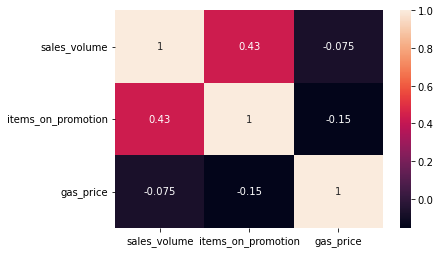

In [78]:
sns.heatmap(data.corr(),annot=True )

<AxesSubplot:xlabel='items_on_promotion', ylabel='sales_volume'>

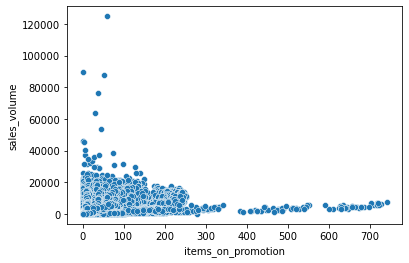

In [76]:
sns.scatterplot(data=data, x='items_on_promotion',y='sales_volume')

<AxesSubplot:xlabel='gas_price', ylabel='sales_volume'>

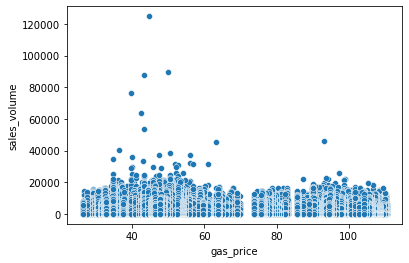

In [75]:
sns.scatterplot(data=data, x='gas_price',y='sales_volume')

## Part II: predictive analytics:

In [107]:
dataset = data.query('sales_volume!=0.0')

In [172]:
# train dataset:
train = dataset.loc[data['sales_volume'].notnull(),:]
X_train = train.drop(columns=['sales_volume','date','store_type','store_cluster'])


In [109]:
y_train = train['sales_volume']

In [110]:
# test dataset:
test = dataset.loc[data['sales_volume'].isnull(),:]
X_test = test.drop(columns=['sales_volume','date','store_type','store_cluster'])

In [82]:
from statsmodels.formula.api import ols

In [89]:
data.columns

Index(['date', 'store_number', 'store_type', 'store_cluster', 'product_family',
       'sales_volume', 'items_on_promotion', 'gas_price', 'national_holiday',
       'regional_holiday', 'local_holiday', 'day_of_week', 'year', 'month'],
      dtype='object')

In [120]:
model = ols("np.log(sales_volume) ~ store_number + product_family + items_on_promotion + gas_price + national_holiday + regional_holiday + local_holiday + day_of_week + year + month", data=train).fit()

In [121]:
print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     np.log(sales_volume)   R-squared:                       0.893
Model:                              OLS   Adj. R-squared:                  0.893
Method:                   Least Squares   F-statistic:                 1.549e+05
Date:                  Mon, 01 Aug 2022   Prob (F-statistic):               0.00
Time:                          09:58:31   Log-Likelihood:            -2.3772e+06
No. Observations:               2061758   AIC:                         4.755e+06
Df Residuals:                   2061646   BIC:                         4.756e+06
Df Model:                           111                                         
Covariance Type:              nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [123]:
train['predicted_sales_volume'] = np.exp(model.predict(X_train))

/var/folders/s3/py6b6qd51n1bxdr0pnbsjwy40000gn/T/ipykernel_98229/1406944995.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['predicted_sales_volume'] = np.exp(model.predict(X_train))


<AxesSubplot:>

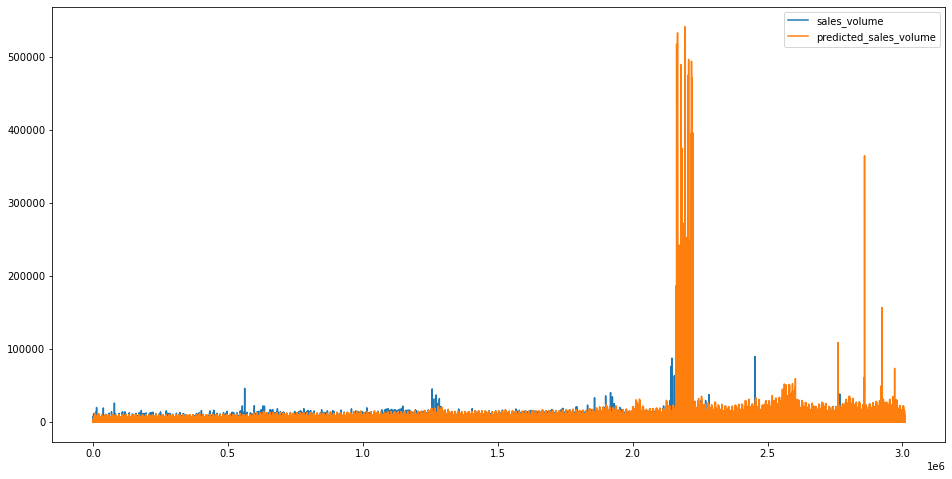

In [128]:
train[['sales_volume'].plot(figsize=(16,8))

In [153]:
test['predicted_sales_volume'] = np.ceil(np.exp(model.predict(X_test)))

/var/folders/s3/py6b6qd51n1bxdr0pnbsjwy40000gn/T/ipykernel_98229/656582870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicted_sales_volume'] = np.ceil(np.exp(model.predict(X_test)))


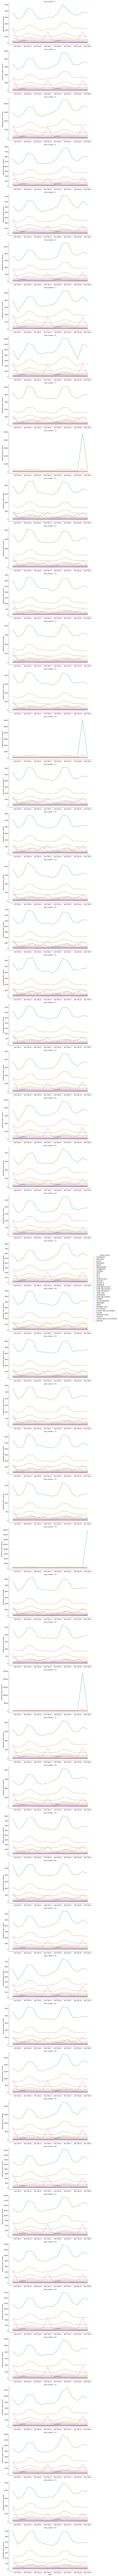

In [169]:
sns.relplot(data=test, x='date' , y ='predicted_sales_volume', hue="product_family", markers=True, row='store_number' , kind='line', aspect = 2,
           facet_kws={'sharey': False, 'sharex': False})

In [161]:
test.to_csv('forecast_final.csv')

In [171]:
train.to_csv('historical_final.csv')

In [163]:
data.to_csv('integrated_final.csv')